<a href="https://colab.research.google.com/github/AdanALalawni/NLP/blob/main/Natural_Language_Processing_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week1 (sentiment in text)**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# prompt: load json dataset from kaggle directlly

!pip install kaggle
!pip install opendatasets

ERROR: Operation cancelled by user


In [ ]:
import opendatasets as od


ModuleNotFoundError: No module named 'opendatasets'

In [ ]:
od.download("https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/data")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def tok(s):
  token=Tokenizer(oov_token="<OOV>")
  token.fit_on_texts(s)
  word_index=token.word_index
  seq=token.texts_to_sequences(s)
  print(word_index)
  return pad_sequences(seq,padding='post',truncating='post')
s={
    'I really love my dog',
    'I love my cat',
    'i think my dog is amazing also its prety'
}

print(tok(s))

In [ ]:
s={
    'I really love my dog',
    'I love my cat',
    'i think my dog is amazing also its prety'
}
token=Tokenizer(num_words=100,oov_token="<'OOV'>")
token.fit_on_texts(s)
word_index=token.word_index
seq=token.texts_to_sequences(s)
pad=pad_sequences(seq,padding='post',truncating='post')
print(word_index)
print(seq)
print(pad)

In [ ]:
import json
import pandas as pd

In [ ]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('/content/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json'))


In [ ]:
sentances =[]
lables=[]
url=[]
for item in data:
  url.append(item['article_link'])
  sentances.append(item['headline'])
  lables.append(item['is_sarcastic'])
print(lables)

In [ ]:
pad=tok(sentances)
print(pad[12])
pad.shape

# **Week2(Word Embeddings)**

In [ ]:

print(tf.__version__)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow_datasets as tfds
imdb ,info= tfds.load("imdb_reviews" ,with_info=True ,as_supervised=True)

In [ ]:
print(info)

In [ ]:
print(imdb)

In [ ]:
import numpy as np

# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

word Embeddings

In [ ]:
from keras import layers
# Parameters

vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

In [ ]:
num_epochs = 10

# Train the model
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

In [ ]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

sarcasm dataset word embedding





In [ ]:
import json
vocab_size =10000
embededding_dim=16
max_length=32
training_size=20000
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('/content/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json'))
sentances =[]
lables=[]
for item in data:
  sentances.append(item['headline'])
  lables.append(item['is_sarcastic'])
labels=np.array(lables)
print(type(lables))


In [ ]:
training_sentences=sentances[0:training_size]
testing_sentences=sentances[training_size:]
training_labels=lables[0:training_size]
testing_labels=lables[training_size:]

In [ ]:
print(type(training_labels))

In [ ]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token="<OOv>")
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sentences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sentences,maxlen=max_length,truncating="post",padding="post")
testing_sentences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sentences,maxlen=max_length,truncating="post",padding="post")

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
model.summary()

In [ ]:
print(type(training_padded),type(training_labels))

In [ ]:
history =model.fit(training_padded,np.array(training_labels),epochs=30,
                   validation_data=(testing_padded,np.array(testing_labels)))

the accurcy afected by hyperparamitar like embedding_dimantion, number of word and number of epoches  

In [ ]:
import matplotlib.pyplot as plt
def plot_graph(history , string):
  plt.figure(figsize=(5,5))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epoche')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


In [ ]:
plot_graph(history,"accuracy")
plot_graph(history,"loss")

Pre_tokenized database

In [ ]:
imdb ,info =tfds.load("imdb_reviews/subwords8k",with_info=True , as_supervised=True)

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_data , test_data =imdb['train'],imdb['test']
tokenizer_subwords =info.features['text'].encoder
# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [ ]:
print(tokenizer_subwords.subwords)

In [ ]:
sample="hi Adan how are you"
tokenized_sample =tokenizer_subwords.encode(sample)
print("sample after encoding {}".format(tokenized_sample))
sample_decoded =tokenizer_subwords.decode(tokenized_sample)
print("sample after decode {}".format(sample_decoded))
for ts in tokenized_sample:
  print('{}---->{}'.format(ts,tokenizer_subwords.decode([ts])))

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size,64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.summary()
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

In [ ]:
plot_graph(history,"accuracy")
plot_graph(history,"loss")

# **Week3 (sequence models)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
history = model.fit(train_dataset, epochs=15, validation_data=test_dataset)

In [ ]:
plot_graph(history,"loss")

In [ ]:
plot_graph(history,'accuracy')

# **Week4(Sequence models and literature)**

In [ ]:
tokenizer=Tokenizer()
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus=data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_word=len(tokenizer.word_index)+1
print(total_word)

In [ ]:
import numpy as np
input_sentences=[]
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
      n_gram=token_list[:i+1]
      input_sentences.append(n_gram)
max_len_sentence = max([len(x) for x in input_sentences])
input_sentences = np.array(pad_sequences(input_sentences, maxlen=max_len_sentence, padding='pre'))

In [ ]:
xs = input_sentences[:, :-1]
labels = input_sentences[:, -1]
ys=tf.keras.utils.to_categorical(labels,num_classes=total_word)
print(xs)

In [ ]:
from keras.layers import Embedding , LSTM , Dense , Bidirectional
model=tf.keras.Sequential([
    Embedding(total_word,64,input_length=max_len_sentence-1),
    Bidirectional(LSTM(40)),
    Dense(total_word , activation="softmax")]
)
model.compile(optimizer="adam", metrics=['accuracy'], loss="categorical_crossentropy")

In [ ]:
history=model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 7s 116ms/step - loss: 5.5671 - accuracy: 0.0243
Epoch 2/500
15/15 [==============================] - 1s 37ms/step - loss: 5.5249 - accuracy: 0.0574
Epoch 3/500
15/15 [==============================] - 0s 34ms/step - loss: 5.3462 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 1s 41ms/step - loss: 5.1396 - accuracy: 0.0442
Epoch 5/500
15/15 [==============================] - 0s 20ms/step - loss: 5.0606 - accuracy: 0.0375
Epoch 6/500
15/15 [==============================] - 0s 15ms/step - loss: 5.0305 - accuracy: 0.0419
Epoch 7/500
15/15 [==============================] - 0s 21ms/step - loss: 5.0047 - accuracy: 0.0464
Epoch 8/500
15/15 [==============================] - 0s 34ms/step - loss: 4.9601 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 15ms/step - loss: 4.9156 - accuracy: 0.0486
Epoch 10/500
15/15 [==============================] - 1s 42ms/step - loss: 4.8606 - accuracy: 0.050

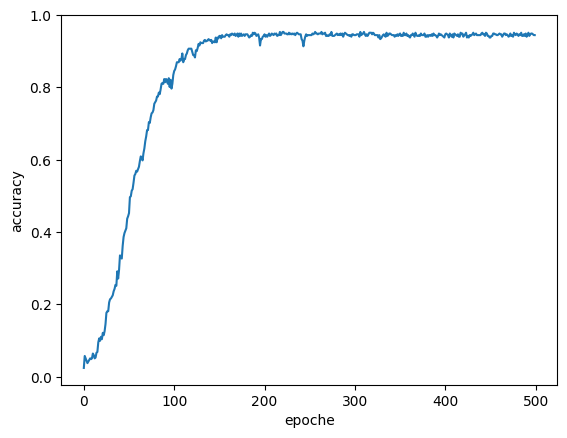

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoche')
plt.ylabel('accuracy')
plt.show()

In [ ]:
seed_text="Laurence went to dublin"
token_list=tokenizer.texts_to_sequences([seed_text])[0]
token_list=pad_sequences([token_list] ,maxlen=max_len_sentence-1 , padding='pre')
prop=model.predict(token_list)
result=np.argmax(prop ,axis=-1)[0]
out_word=tokenizer.index_word[result]
seed_text+=" "+ out_word
print(seed_text)

1/1 [==============================] - 0s 30ms/step
Laurence went to dublin boys


In [ ]:
seed_text="Laurence went to dublin"
next_word=10
for _ in range(next_word):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list] ,maxlen=max_len_sentence-1 , padding='pre')
  prop=model.predict(token_list)
  result=np.argmax(prop ,axis=-1)[0]
  out_word=tokenizer.index_word[result]
  seed_text+=" "+ out_word
  print(seed_text)

1/1 [==============================] - 0s 61ms/step
Laurence went to dublin boys
1/1 [==============================] - 0s 107ms/step
Laurence went to dublin boys the
1/1 [==============================] - 0s 80ms/step
Laurence went to dublin boys the ructions
1/1 [==============================] - 0s 99ms/step
Laurence went to dublin boys the ructions of
1/1 [==============================] - 0s 37ms/step
Laurence went to dublin boys the ructions of and
1/1 [==============================] - 0s 34ms/step
Laurence went to dublin boys the ructions of and girls
1/1 [==============================] - 0s 33ms/step
Laurence went to dublin boys the ructions of and girls were
1/1 [==============================] - 0s 33ms/step
Laurence went to dublin boys the ructions of and girls were had
1/1 [==============================] - 0s 28ms/step
Laurence went to dublin boys the ructions of and girls were had eyes
1/1 [==============================] - 0s 28ms/step
Laurence went to dublin boys the 

Poetry

In [ ]:
data=open('/content/Laurences_generated_poetry.txt').read()
tokenizer=Tokenizer()
corpus=data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_word=len(tokenizer.word_index)+1
print(total_word)

2690


In [ ]:
import numpy as np
input_sentences=[]
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
      n_gram=token_list[:i+1]
      input_sentences.append(n_gram)
max_len_sentence = max([len(x) for x in input_sentences])
input_sentences = np.array(pad_sequences(input_sentences, maxlen=max_len_sentence, padding='pre'))

In [ ]:
xs = input_sentences[:, :-1]
labels = input_sentences[:, -1]
ys=tf.keras.utils.to_categorical(labels,num_classes=total_word)
print(xs)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]


In [ ]:
from keras.layers import Embedding , LSTM , Dense , Bidirectional
from keras.optimizers import Adam
model=tf.keras.Sequential([
    Embedding(total_word,100,input_length=max_len_sentence-1),
    Bidirectional(LSTM(150)),
    Dense(total_word , activation="softmax")]
)
adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam, metrics=['accuracy'], loss="categorical_crossentropy")

In [ ]:
history=model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
377/377 [==============================] - 17s 36ms/step - loss: 6.6585 - accuracy: 0.0735
Epoch 2/500
377/377 [==============================] - 3s 9ms/step - loss: 5.7441 - accuracy: 0.1126
Epoch 3/500
377/377 [==============================] - 5s 13ms/step - loss: 4.8718 - accuracy: 0.1687
Epoch 4/500
377/377 [==============================] - 4s 11ms/step - loss: 3.8919 - accuracy: 0.2482
Epoch 5/500
377/377 [==============================] - 3s 8ms/step - loss: 3.0079 - accuracy: 0.3540
Epoch 6/500
377/377 [==============================] - 3s 8ms/step - loss: 2.3156 - accuracy: 0.4774
Epoch 7/500
377/377 [==============================] - 6s 16ms/step - loss: 1.8385 - accuracy: 0.5668
Epoch 8/500
377/377 [==============================] - 4s 10ms/step - loss: 1.4818 - accuracy: 0.6440
Epoch 9/500
377/377 [==============================] - 3s 9ms/step - loss: 1.2662 - accuracy: 0.6972
Epoch 10/500
377/377 [==============================] - 4s 10ms/step - loss: 1.1498 -

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoche')
plt.ylabel('accuracy')
plt.show()